# Data Preprocessing Tools

## Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [51]:
df = pd.read_csv('File.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [52]:
print(X)

[['Moiz' 27.0 72000.0]
 ['Ahmed' 32.0 48000.0]
 ['Mansoori' 30.0 54000.0]
 ['Talha' 38.0 61000.0]
 ['Taha' 40.0 nan]
 ['Hamza' 35.0 58000.0]
 ['Muzamil' nan 52000.0]
 ['Wajahat' 48.0 79000.0]
 ['Hussain' 50.0 83000.0]
 ['Sami' 37.0 67000.0]]


In [53]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [55]:
print(X)

[['Moiz' 27.0 72000.0]
 ['Ahmed' 32.0 48000.0]
 ['Mansoori' 30.0 54000.0]
 ['Talha' 38.0 61000.0]
 ['Taha' 40.0 63777.77777777778]
 ['Hamza' 35.0 58000.0]
 ['Muzamil' 37.44444444444444 52000.0]
 ['Wajahat' 48.0 79000.0]
 ['Hussain' 50.0 83000.0]
 ['Sami' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [56]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender (Male = 1, Female = 0)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Encode Purchased (Yes = 1, No = 0)
le_purchase = LabelEncoder()
df['Purchased'] = le_purchase.fit_transform(df['Purchased'])

In [57]:
print(X)

[['Moiz' 27.0 72000.0]
 ['Ahmed' 32.0 48000.0]
 ['Mansoori' 30.0 54000.0]
 ['Talha' 38.0 61000.0]
 ['Taha' 40.0 63777.77777777778]
 ['Hamza' 35.0 58000.0]
 ['Muzamil' 37.44444444444444 52000.0]
 ['Wajahat' 48.0 79000.0]
 ['Hussain' 50.0 83000.0]
 ['Sami' 37.0 67000.0]]


### Encoding the Dependent Variable

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [59]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [61]:
print(X_train)

[['Muzamil' 37.44444444444444 52000.0]
 ['Taha' 40.0 63777.77777777778]
 ['Moiz' 27.0 72000.0]
 ['Talha' 38.0 61000.0]
 ['Ahmed' 32.0 48000.0]
 ['Wajahat' 48.0 79000.0]
 ['Hussain' 50.0 83000.0]
 ['Hamza' 35.0 58000.0]]


In [62]:
print(X_test)

[['Mansoori' 30.0 54000.0]
 ['Sami' 37.0 67000.0]]


In [63]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [64]:
print(y_test)

[0 1]


## Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

# Scaling Age and Salary
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

In [66]:
print(X_train)

[['Muzamil' 37.44444444444444 52000.0]
 ['Taha' 40.0 63777.77777777778]
 ['Moiz' 27.0 72000.0]
 ['Talha' 38.0 61000.0]
 ['Ahmed' 32.0 48000.0]
 ['Wajahat' 48.0 79000.0]
 ['Hussain' 50.0 83000.0]
 ['Hamza' 35.0 58000.0]]


In [67]:
print(X_test)

[['Mansoori' 30.0 54000.0]
 ['Sami' 37.0 67000.0]]


## Outliers Detection

In [68]:
# Detect outliers using z-score
from scipy.stats import zscore

z_scores = zscore(df[['Age', 'Salary']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Add a new column to label outliers
df['Outlier'] = ~filtered_entries

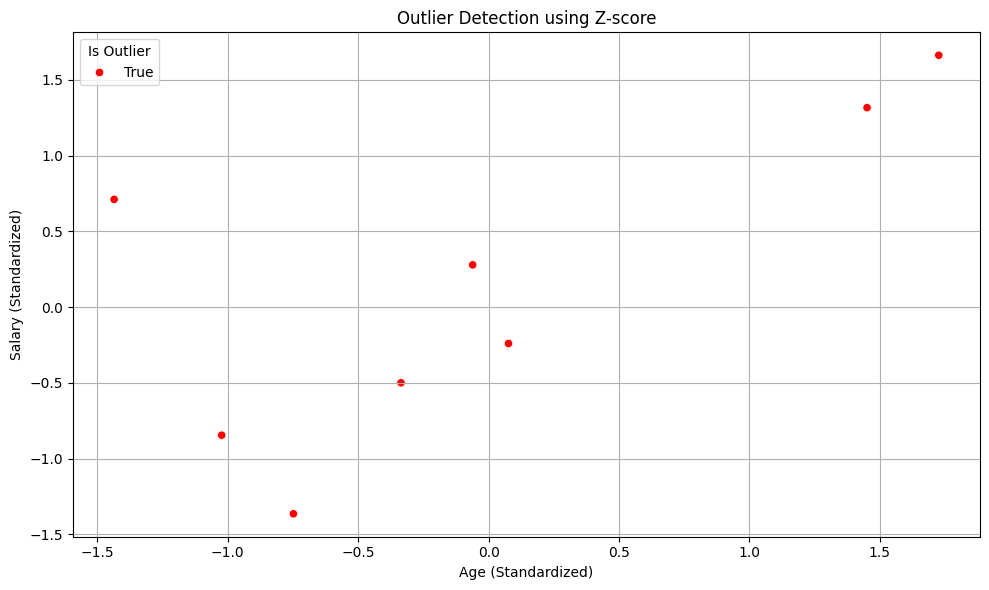

In [69]:
# Step 6: Plot Age vs Salary with outliers marked
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Outlier', palette={False: 'green', True: 'red'})
plt.title("Outlier Detection using Z-score")
plt.xlabel("Age (Standardized)")
plt.ylabel("Salary (Standardized)")
plt.legend(title='Is Outlier')
plt.grid(True)
plt.tight_layout()
plt.show()